# Задание 2
### Тарасюк Юлия

# 2.1

In [2]:
from matplotlib import pyplot as plt
import networkx as nx 
import numpy as np

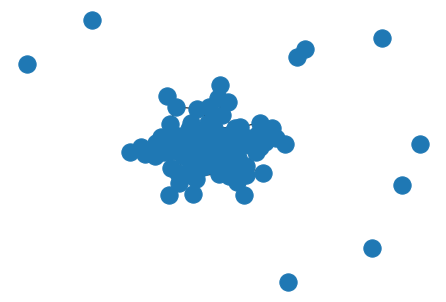

In [3]:
# генерируем один граф Эрдоша-Реньи
er_gr = nx.erdos_renyi_graph(100, 0.03)

# заадём распределение Пуассона
def poisson(mu,k):
    return np.exp(-mu) * mu**k / (np.math.factorial(k))

# рисуем один граф
nx.draw(er_gr)
plt.show()

#### Напишем функцию для генерации n-го количества графов 

In [4]:
from collections import defaultdict
def distribution(n, N, p):
    er_size = []
    degree_dict = defaultdict(lambda: 0)
    for _ in range(n):
        er_gr = nx.erdos_renyi_graph(N, p)
        er_size.append(er_gr.size())
        for vertex, degree in nx.degree(er_gr):
            degree_dict[degree] += 1
    unique_degree = sorted(degree_dict.keys())
    degree_list = np.array(list(dict(sorted(degree_dict.items())).values())) / n
    return unique_degree, degree_list, er_size

In [5]:
def drawing(func):
    plt.figure(figsize=(12, 9))
    plt.bar(func[0], func[1], color ='darkorange', label=r'Гистограмма эмпирическая, количество графов = ' + str(quantity)) 
    
    mu = 2 * np.mean(func[2]) / 100;
    k = list(range(1, 12))
    deg = [100*np.exp(-mu)]+[100 * poisson(mu,i) for i in k]

    plt.plot([0]+k, deg, lw = 5, color = 'g', label = r'Теоретическое распределение')
    plt.legend(loc='upper right')
    plt.xlabel("Степень") 
    plt.ylabel("Количество вершин") 
    plt.title("Распределение степеней вершин") 
    plt.show()

Задаём в функцию генерирования $n$ - количество графов,необходимых для функции распределения, $N$ - количество вершин и  $p$ -вероятность образования связи, которая вычисляется $p = \dfrac{<k>}{(N-1)}$

## $$ <k> = 1 $$

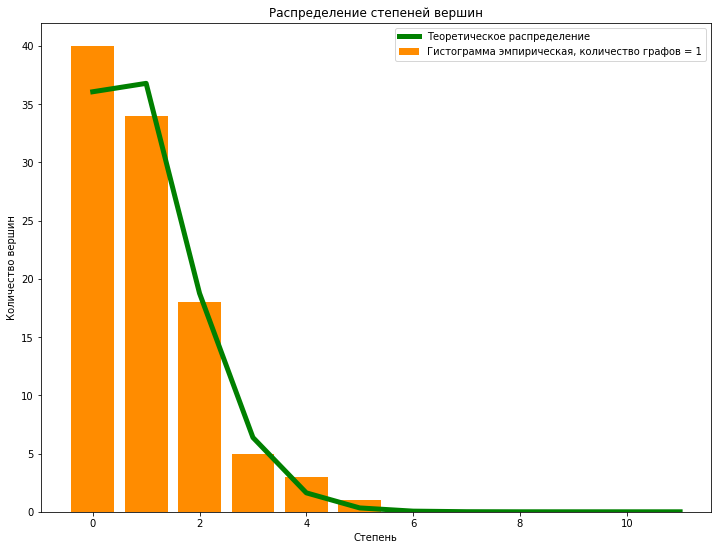

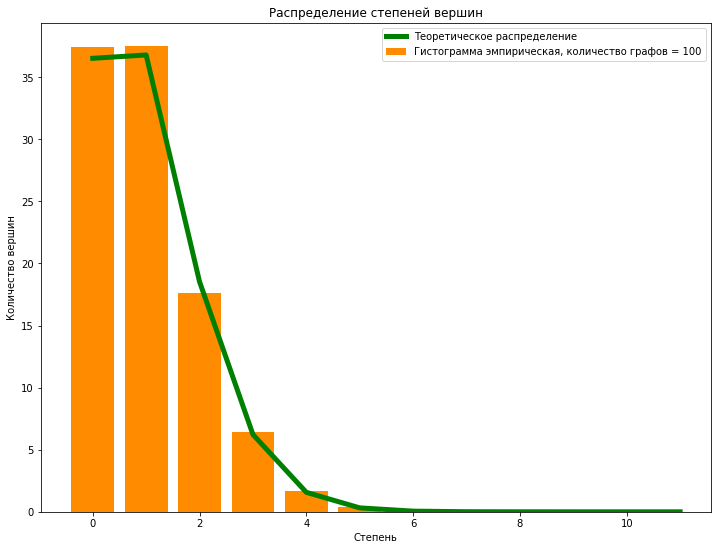

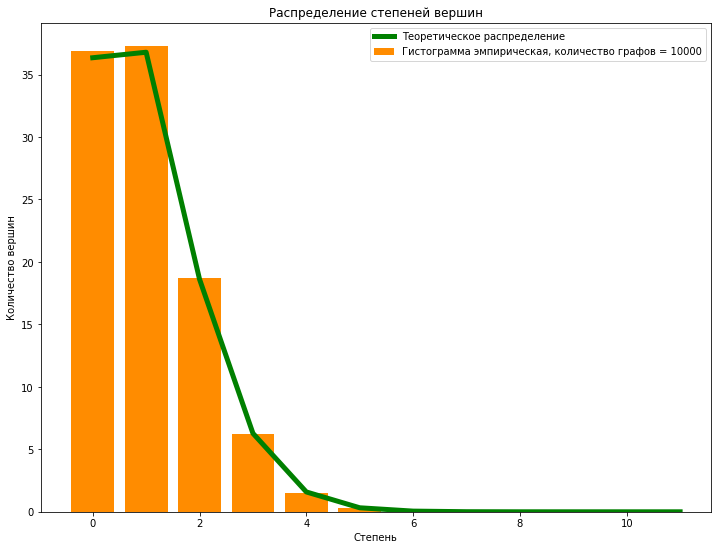

In [9]:
n = [1, 100, 10000]
for quantity in n:
    drawing(distribution(quantity, 101, 0.01))

## Общая гистограмма

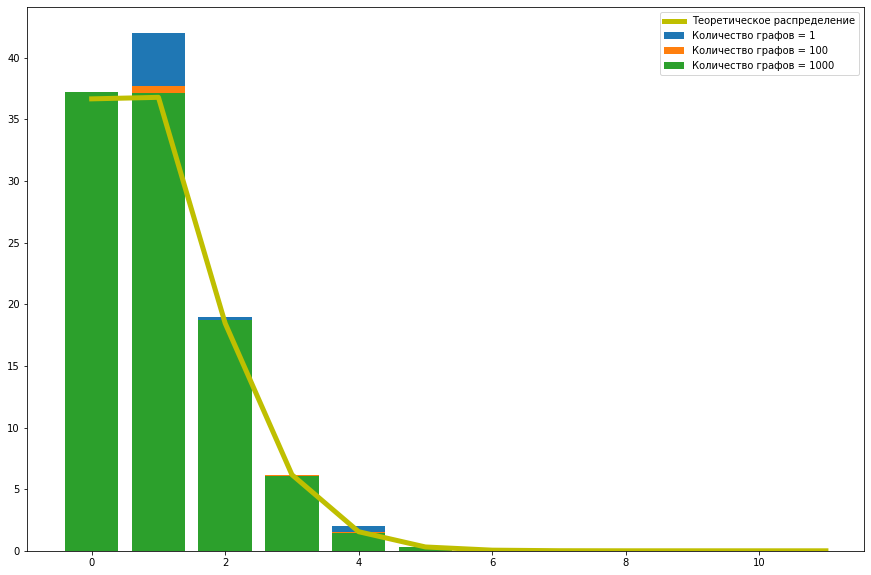

In [8]:
mu = 2 * np.mean(distribution(1000, 101, 0.01)[2]) / 100;
k = list(range(1, 12))
deg = [100*np.exp(-mu)]+[100 * poisson(mu,i) for i in k]
plt.figure(figsize=(15, 10))
plt.bar(*distribution(1, 101, 0.01)[:2], label=r'Количество графов = 1')
plt.bar(*distribution(100, 101, 0.01)[:2], label=r'Количество графов = 100')
plt.bar(*distribution(1000, 101, 0.01)[:2], label=r'Количество графов = 1000')
plt.plot([0]+k, deg, lw = 5, color = 'y', label = r'Теоретическое распределение')
plt.legend(loc='upper right')

Аггрегированная функция, усреднённая с большим количеством графов, лучше всего аппроксимируется теоретическим распределением.

.

## $$ <k> = 2 $$

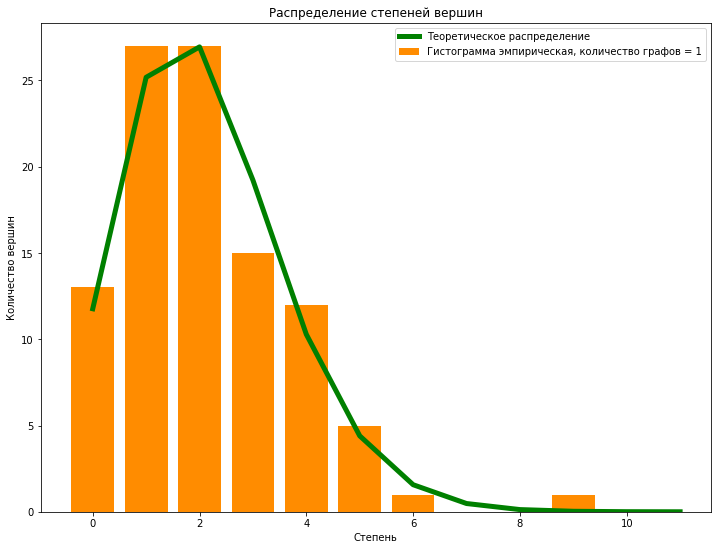

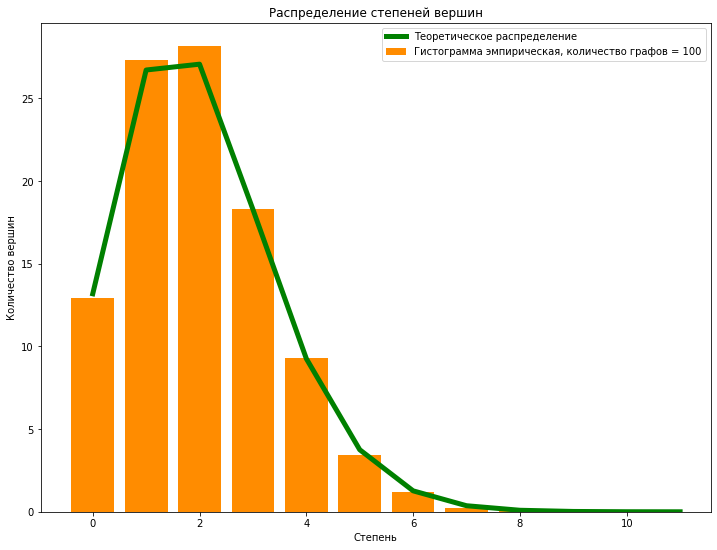

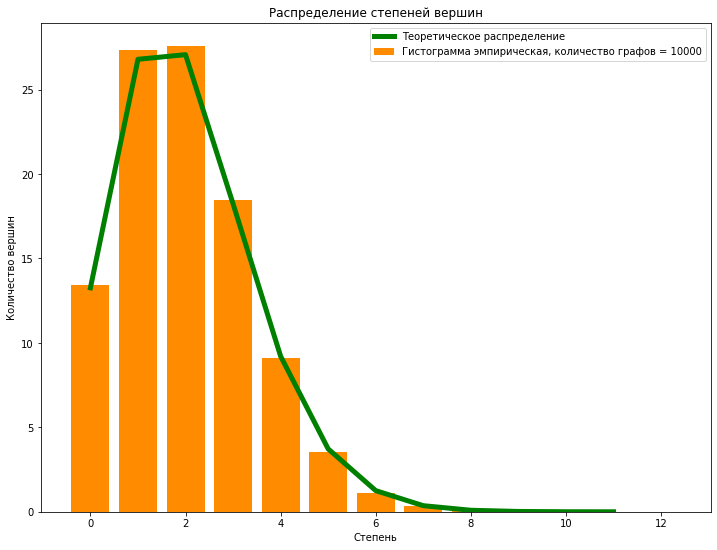

In [10]:
for quantity in n:
    drawing(distribution(quantity, 101, 0.02))

## Общая гистограмма

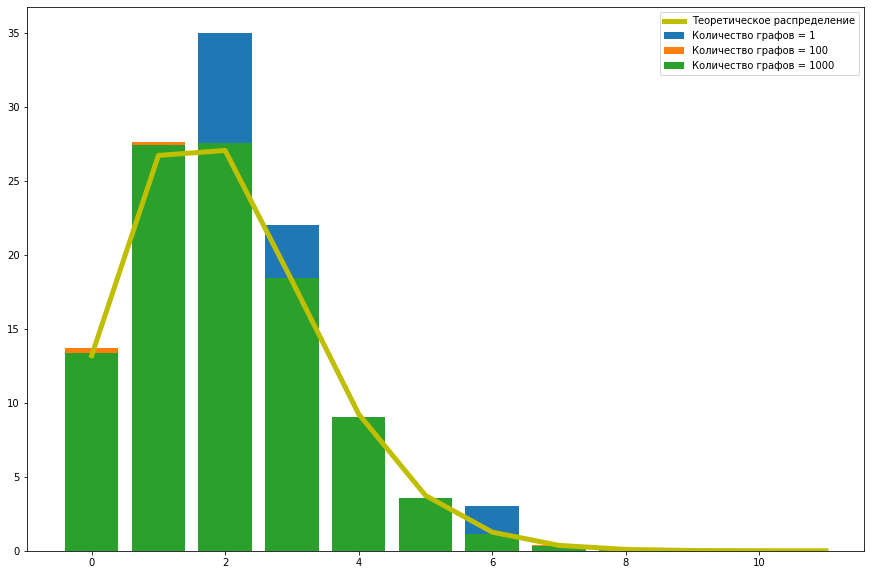

In [11]:
mu = 2 * np.mean(distribution(1000, 101, 0.02)[2]) / 100;
k = list(range(1, 12))
deg = [100*np.exp(-mu)]+[100 * poisson(mu,i) for i in k]
plt.figure(figsize=(15, 10))
plt.bar(*distribution(1, 101, 0.02)[:2], label=r'Количество графов = 1')
plt.bar(*distribution(100, 101, 0.02)[:2], label=r'Количество графов = 100')
plt.bar(*distribution(1000, 101, 0.02)[:2], label=r'Количество графов = 1000')
plt.plot([0]+k, deg, lw = 5, color = 'y', label = r'Теоретическое распределение')
plt.legend(loc='upper right')

## $$ <k> = 3 $$

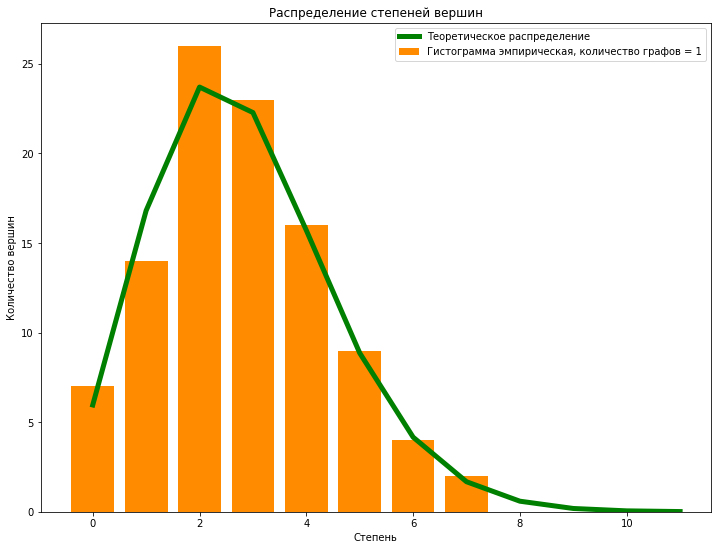

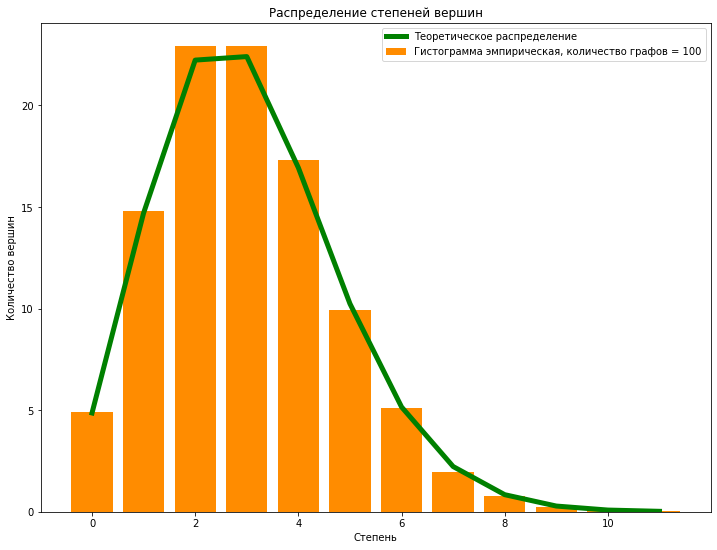

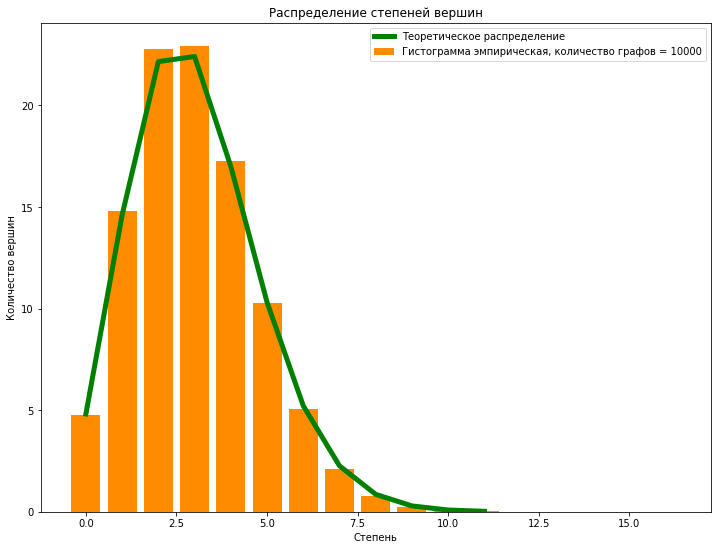

In [12]:
for quantity in n:
    drawing(distribution(quantity, 101, 0.03))

## Общая гистограмма

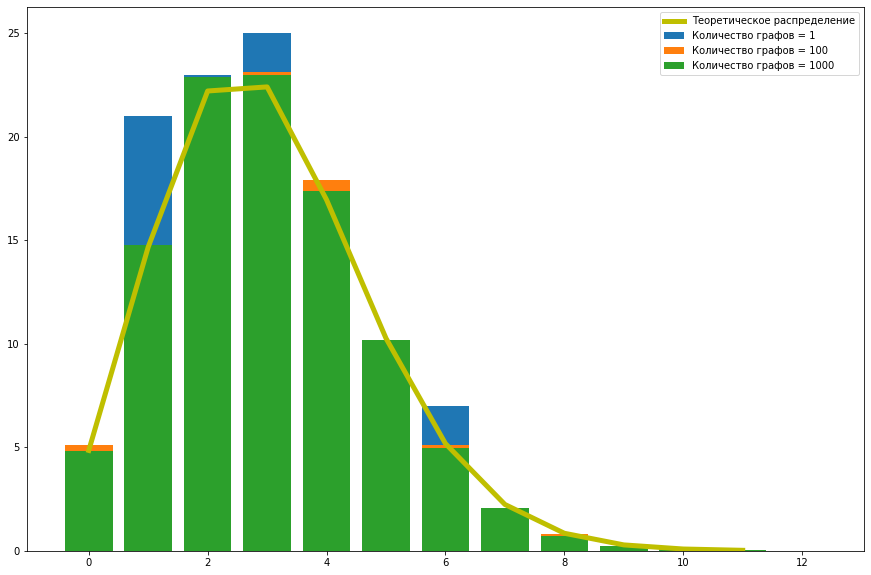

In [13]:
mu = 2 * np.mean(distribution(1000, 101, 0.03)[2]) / 100;
k = list(range(1, 12))
deg = [100*np.exp(-mu)]+[100 * poisson(mu,i) for i in k]
plt.figure(figsize=(15, 10))
plt.bar(*distribution(1, 101, 0.03)[:2], label=r'Количество графов = 1')
plt.bar(*distribution(100, 101, 0.03)[:2], label=r'Количество графов = 100')
plt.bar(*distribution(1000, 101, 0.03)[:2], label=r'Количество графов = 1000')
plt.plot([0]+k, deg, lw = 5, color = 'y', label = r'Теоретическое распределение')
plt.legend(loc='upper right')

### Небольшие выводы:

Аггрегированная функция, усреднённая с большим количеством графов, лучше всего аппроксимируется теоретическим распределением.

100 и 1000 иттераций отличаются не сильно между собой. У одного графа распределение, разумеется, отличается от двух оставшихся. 

Чем больше вероятность образовать связь $p$, тем больше степень у вершин.  